In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="notebook", style="whitegrid", palette=sns.color_palette("muted", 2))

## 探索数据

In [2]:
data = pd.read_csv("train.csv")
data.head()

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y,Y_1,136.0,150.0,offline,intermediate,9389.0,M,Matriculation,3.0,24.0,5.0,N,1.0,0
1,16523_44,T,T_1,131.0,44.0,offline,easy,16523.0,F,High School Diploma,4.0,26.0,2.0,N,3.0,1
2,13987_178,Z,Z_2,120.0,178.0,online,easy,13987.0,M,Matriculation,1.0,40.0,1.0,N,2.0,1
3,13158_32,T,T_2,117.0,32.0,offline,easy,13158.0,F,Matriculation,3.0,NaN,4.0,N,1.0,1
4,10591_84,V,V_3,131.0,84.0,offline,intermediate,10591.0,F,High School Diploma,1.0,42.0,2.0,N,4.0,1


In [3]:
data.columns

Index(['id_num', 'program_type', 'program_id', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

In [4]:
data.shape

(49998, 16)

In [5]:
## 查重
data.duplicated().sum()

0

In [6]:
data[data['is_pass'] == 1].shape[0] / data.shape[0] 

0.6962878515140606

**正例比例大约在70%**

In [7]:
total = data.isnull().sum().sort_values(ascending = False)
percent = round(data.isnull().sum().sort_values(ascending = False)/len(data)*100, 2)

In [8]:
miss = pd.concat([total,percent],axis=1)
miss.columns=['Total','Percent']

In [9]:
miss

,Total,Percent
age,19379,38.76
trainee_engagement_rating,772,1.54
trainee_id,739,1.48
program_type,731,1.46
test_id,725,1.45
is_handicapped,718,1.44
gender,707,1.41
difficulty_level,703,1.41
test_type,702,1.40
education,702,1.40


**age缺失值很多，考虑去除**

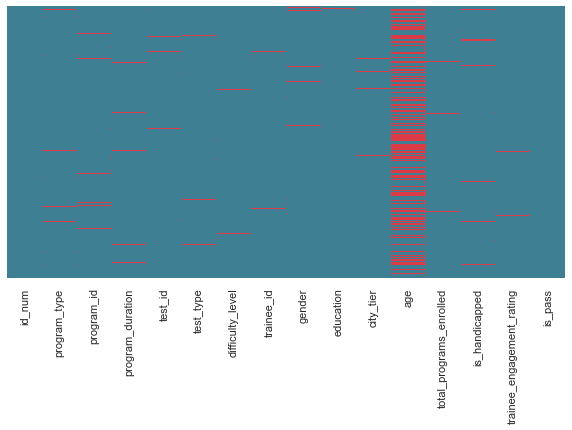

In [10]:
# 缺失值可视化
cmap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize = (10,5))
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = cmap)

## 特征分析

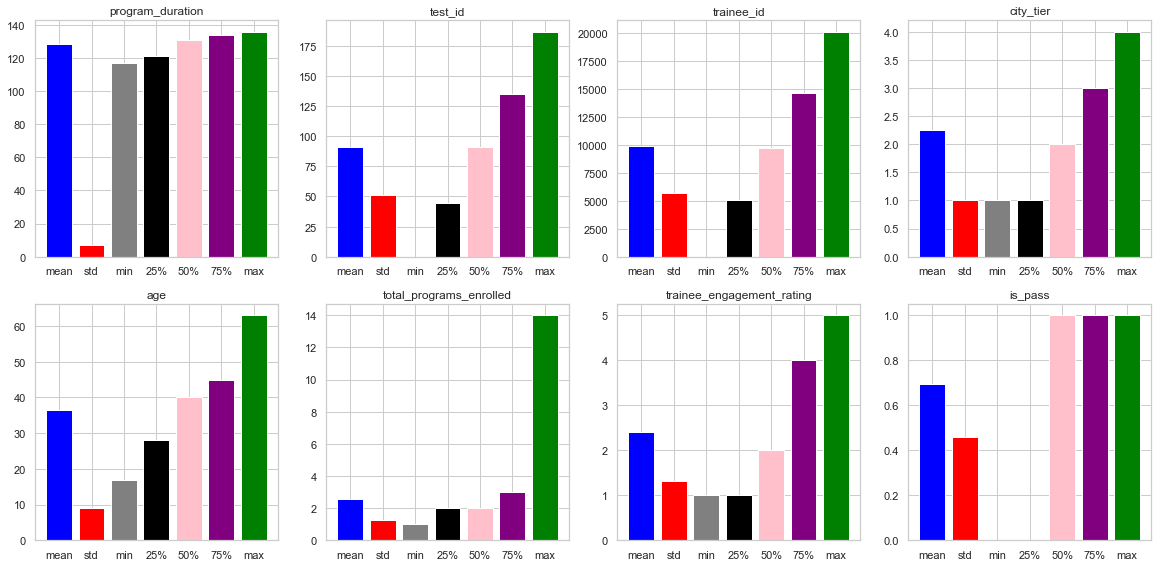

In [11]:
# 数值特征总览
data_describe = data.describe()
columns = data.describe().columns
index = data_describe.index[1:]
colors = ['b','r','gray','black','pink','purple','g','y']
plt.figure(figsize=(20,20))
for i in range(len(columns)):
    ax = plt.subplot(4, 4, i+1)
    ax.set_title(columns[i])
    for j in range(len(index)):
        plt.bar(index[j], data_describe.loc[index[j],columns[i]], color=colors[j])
plt.show()

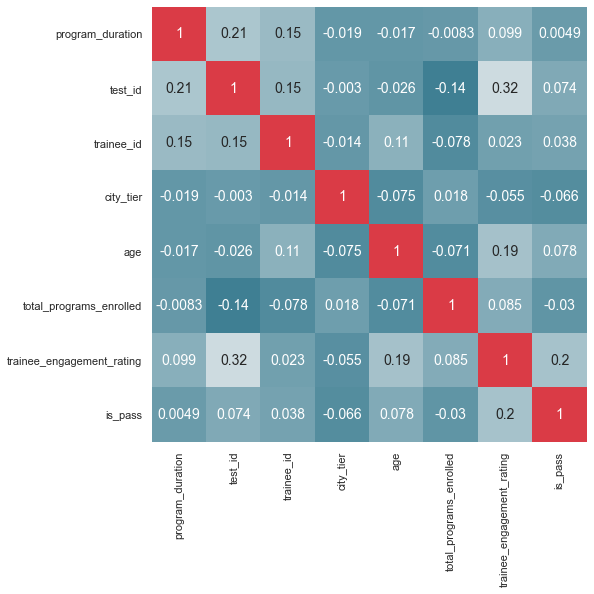

In [12]:
# 特征相关性可视化
plt.figure(figsize = (20,8))
sns.heatmap(data.corr(), cmap = cmap, square = True, cbar = False,  annot = True, annot_kws = {'fontsize':14})
plt.savefig('C:/Users/wkml996/Desktop/photo/r2.png')

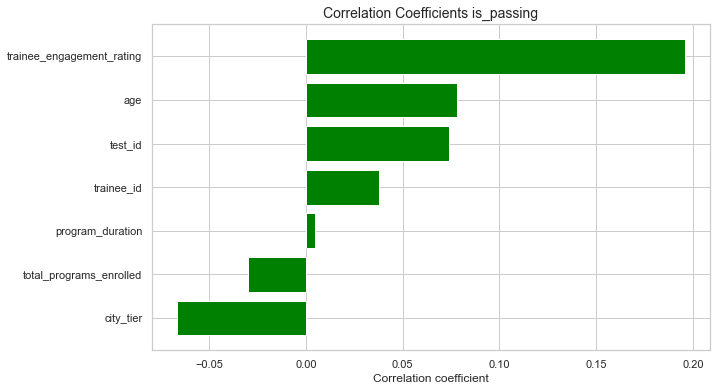

In [13]:
# is_pass最相关可视化
Survive_Corr = data.corr()["is_pass"]
Survive_Corr = Survive_Corr[:-1]
Survive_Corr = Survive_Corr[np.argsort(Survive_Corr, axis = 0)] 
fig, ax = plt.subplots(figsize = (10,6))
ax.barh(np.arange(len(Survive_Corr)), np.array(Survive_Corr.values), color = 'g')
ax.set_yticks(np.arange(len(Survive_Corr)))
ax.set_yticklabels(Survive_Corr.index)
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients is_passing",fontsize = 14);
plt.show()

**评分是与通过与否最相关的变量，年龄和id次之**

Text(0, 0.5, 'Pass Probability')

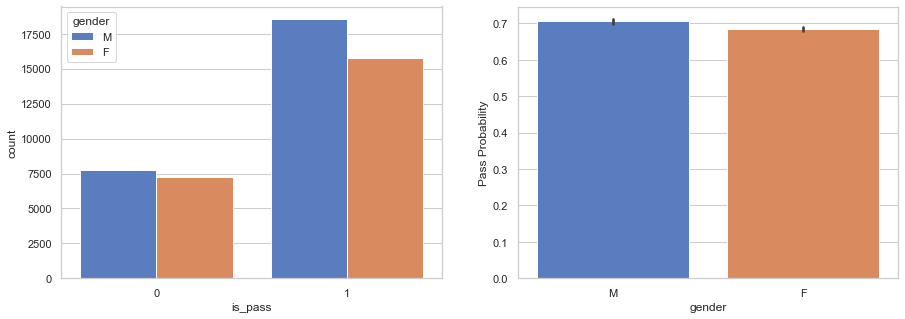

In [14]:
# 性别可视化
plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1)
sns.countplot(x = 'is_pass',hue = 'gender', data = data);


plt.subplot(1, 2, 2)
sns.barplot(x = "gender", y = "is_pass",data = data)
plt.ylabel("Pass Probability")

Text(0, 0.5, 'Pass Probability')

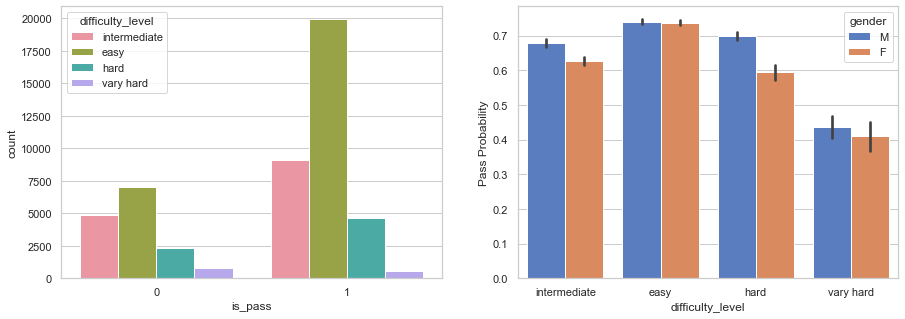

In [15]:
# 难度可视化
plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1)
sns.countplot(x = 'is_pass',hue = 'difficulty_level', data = data,);


#pass probability of males and females
plt.subplot(1, 2, 2)
sns.barplot(x = "difficulty_level", y = "is_pass",hue='gender',data = data)
plt.ylabel("Pass Probability")

**最容易的通过率最高，符合常识,且与性别基本无关**

Text(0, 0.5, 'Pass Probability')

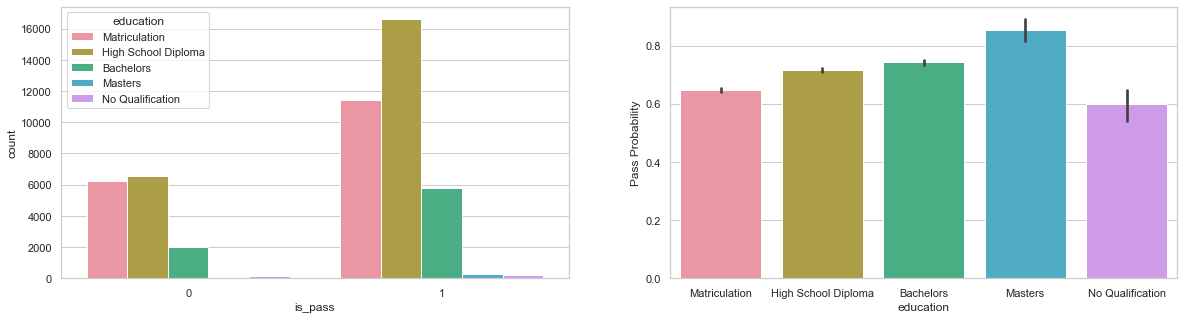

In [16]:
## 学历分析
plt.figure(figsize = (20,5))
plt.subplot(1, 2, 1)
sns.countplot(x = 'is_pass',hue = 'education', data = data);

#pass probability of males and females
plt.subplot(1, 2, 2)
sns.barplot(x = "education", y = "is_pass",data = data)
plt.ylabel("Pass Probability")

**学历越高，通过率越高**

Text(0, 0.5, 'Pass Probability')

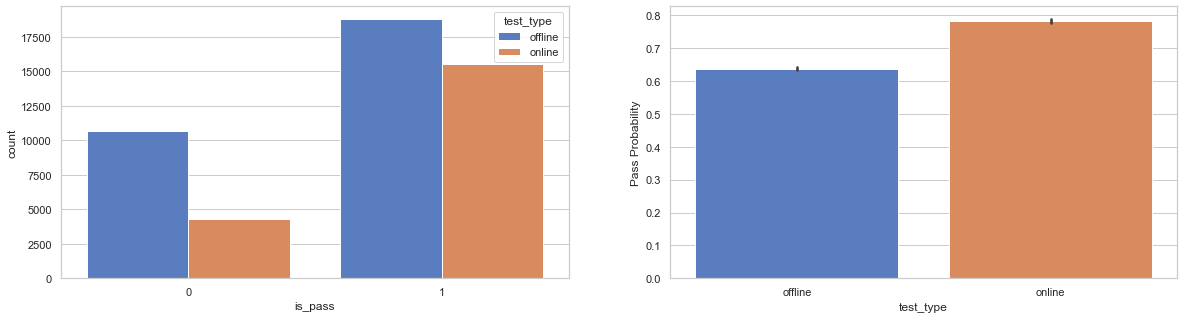

In [17]:
## 学习方式分析
plt.figure(figsize = (20,5))
plt.subplot(1, 2, 1)
sns.countplot(x = 'is_pass',hue = 'test_type', data = data);

#pass probability of males and females
plt.subplot(1, 2, 2)
sns.barplot(x = "test_type", y = "is_pass",data = data)
plt.ylabel("Pass Probability")

**线上学习效略优于线下学习**

Text(0, 0.5, 'Pass Probability')

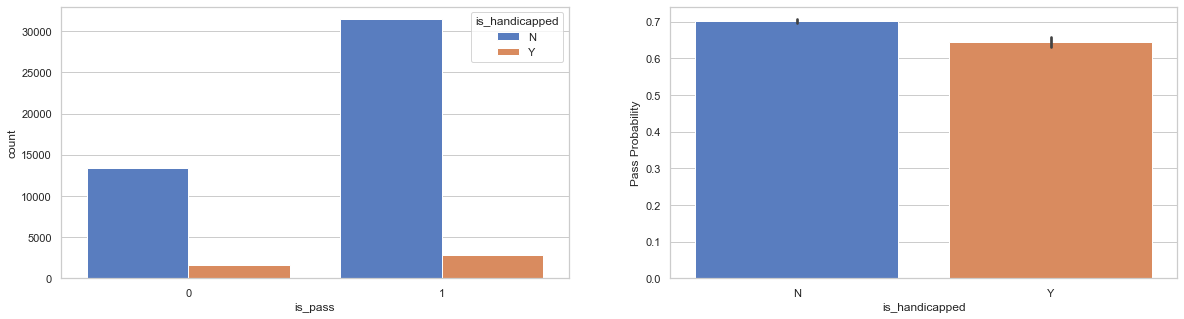

In [18]:
## 残疾分析
plt.figure(figsize = (20,5))
plt.subplot(1, 2, 1)
sns.countplot(x = 'is_pass',hue = 'is_handicapped', data = data);

#pass probability of males and females
plt.subplot(1, 2, 2)
sns.barplot(x = "is_handicapped", y = "is_pass",data = data)
plt.ylabel("Pass Probability")

**残疾比率比较低，并且残疾的通过概率要略低**

Text(0, 0.5, 'Pass Probability')

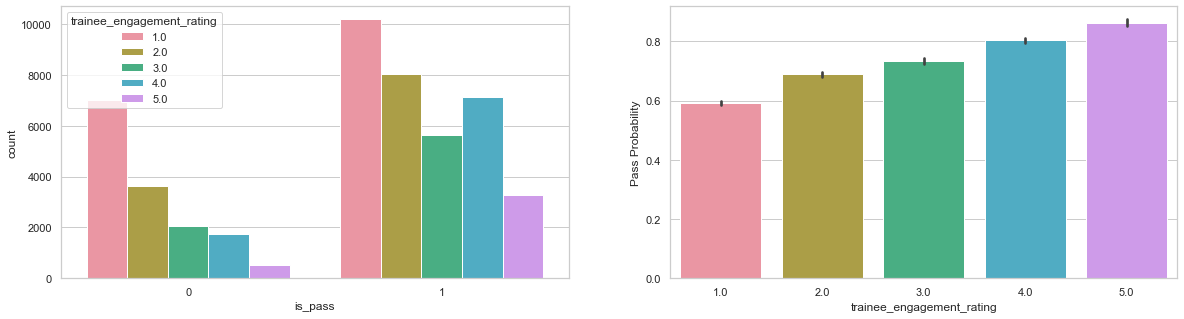

In [19]:
## 评分分析
plt.figure(figsize = (20,5))
plt.subplot(1, 2, 1)
sns.countplot(x = 'is_pass',hue = 'trainee_engagement_rating', data = data);

#pass probability of males and females
plt.subplot(1, 2, 2)
sns.barplot(x = "trainee_engagement_rating", y = "is_pass",data = data)
plt.ylabel("Pass Probability")

**评分越高通过概率越高**

Text(0, 0.5, 'Pass Probability')

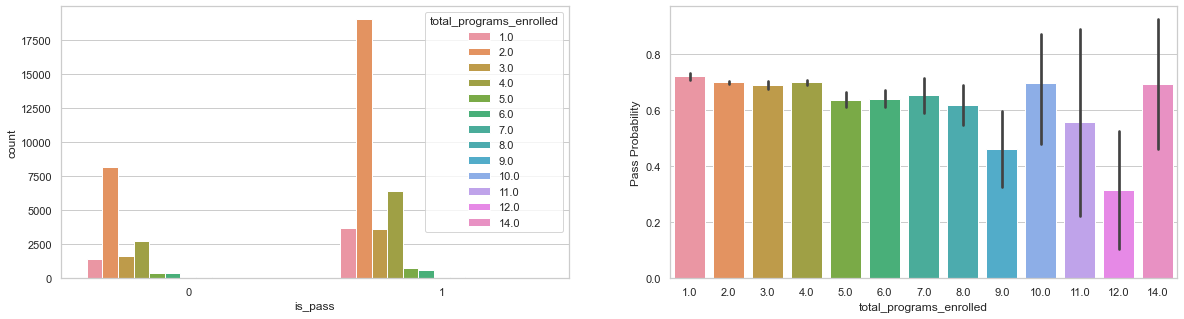

In [20]:
## 选课分析
plt.figure(figsize = (20,5))
plt.subplot(1, 2, 1)
sns.countplot(x = 'is_pass',hue = 'total_programs_enrolled', data = data);

#pass probability of males and females
plt.subplot(1, 2, 2)
sns.barplot(x = "total_programs_enrolled", y = "is_pass",data = data)
plt.ylabel("Pass Probability")

**异常分布的值比较多并且选课通过率比较违反常识，考虑删去**

Text(0, 0.5, 'Pass Probability')

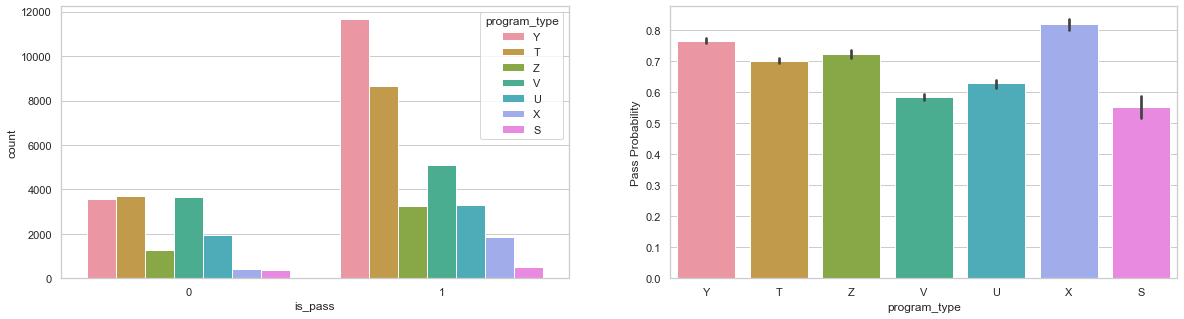

In [21]:
## 类型分析
plt.figure(figsize = (20,5))
plt.subplot(1, 2, 1)
sns.countplot(x = 'is_pass',hue = 'program_type', data = data);

#pass probability of males and females
plt.subplot(1, 2, 2)
sns.barplot(x = "program_type", y = "is_pass",data = data)
plt.ylabel("Pass Probability")

**可以看出 程序的类型对结果有较大影响**

Text(0, 0.5, 'Pass Probability')

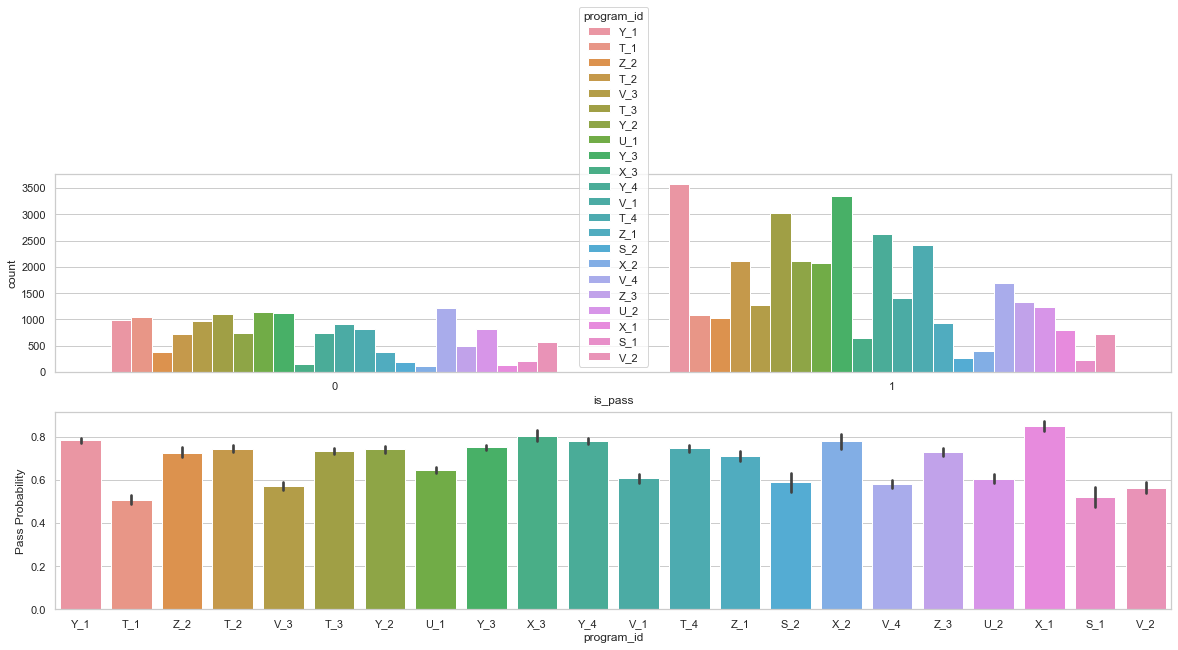

In [22]:
## 类型分析
plt.figure(figsize = (20,8))
plt.subplot(2, 1, 1)
sns.countplot(x = 'is_pass',hue = 'program_id', data = data);

#pass probability of males and females
plt.subplot(2, 1, 2)
sns.barplot(x = "program_id", y = "is_pass",data = data)
plt.ylabel("Pass Probability")

**可以看出，program_id的值对结果影响很大**

Text(0, 0.5, 'Pass Probability')

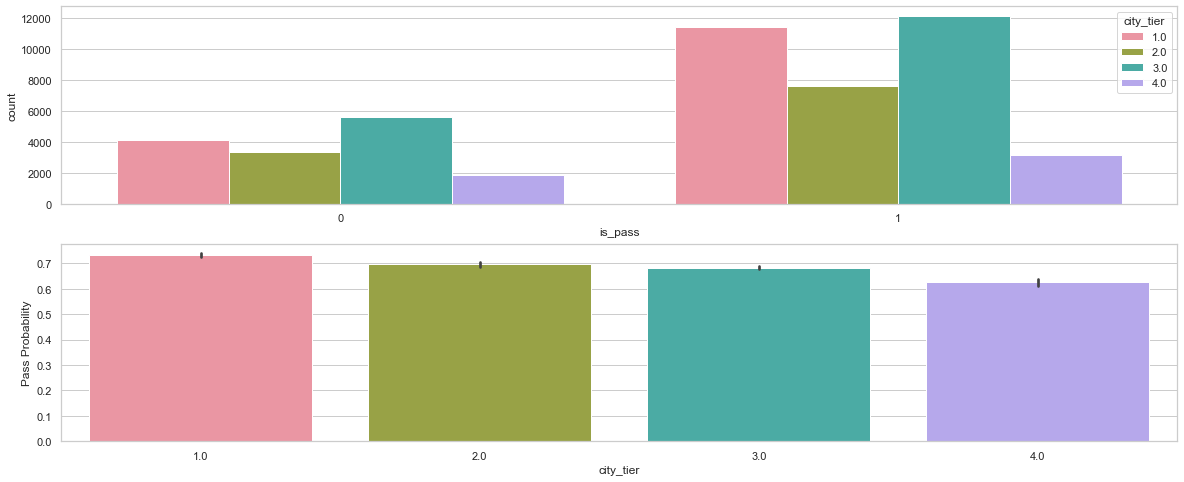

In [23]:
## 类型分析
plt.figure(figsize = (20,8))
plt.subplot(2, 1, 1)
sns.countplot(x = 'is_pass',hue = 'city_tier', data = data);

#pass probability of males and females
plt.subplot(2, 1, 2)
sns.barplot(x = "city_tier", y = "is_pass",data = data)
plt.ylabel("Pass Probability")